<a href="https://colab.research.google.com/github/sara-fuentes/tfm_pisa_educacion/blob/main/Copia_de_TFM_PISA_CLASIFICACI%C3%93N.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pregunta de investigación**
¿Cómo influye la implicación a de padres y profesores en el rendimiento académico de los alumnos?



# Justificación

Esta pregunta busca explorar la relación entre la participación de los padres y profesores en el proceso educativo y su efecto en el desempeño académico de los estudiantes, utilizando un enfoque analítico basado en datos cuantitativos y cualitativos.

# Target:
Rendimiento académico de los estudiantes de España (PISA 2022)

In [ ]:
###¿Cómo construímos esa columna?

Variables que podrían en conjunto ser ese target:


###A continuación se muestran las variables que podrían ayudar a definir el concepto de IMPLICACIÓN.

In [ ]:
###¿Cuantas variables necesitamos para construir un modelo sólido de predicción del rendimiento escolar según la implicación parental?
## ¿Basta con una? ¿Hay mínimo o máximo?

# Variables (Ejemplo Cuestionario Wellbeing)


   
*WB155
*WB155Q08HA Your relationship with your parents/guardians
*WB155Q09HA Your relationship with your teachers

*WB162: How easy is it for you to talk to the following people about things that really bother you?

*WB163 Thinking about your parents or guardians, how often do they do each of the following?

WB163Q01HA Help me as much as I need
WB163Q02HA Let me do the things I like doing
WB163Q03HA Show that they care
WB163Q04HA Try to understand my problems and worries
WB163Q05HA Encourage me to make my own decisions
WB163Q06HA Try to control everything I do
WB163Q07HA Treat me like a baby
WB163Q08HA Make me feel better when I am upset

WB164 How often do you worry about how much money your family has?

# Variables (Ejemplo Cuestionario Parents)

PA003Q01TA Discuss how well my child is doing at school
PA003Q18WA Help my child with his/her mathematics homework
PA003Q05IA Discuss political or social issues with my child
PA003Q20WA Discuss with my child how mathematics can be applied in everyday life
PA003Q12JA Talk to my child about any problems he/she may have at school

Q05
PA008
During <the last academic year>, have you participated
in any of the following school-related activities?

PA185Q01JA
In our family, we encourage participating in extracurricular activities that require creativity.

Q25
PA041
In the last twelve months, about how much have you
paid to educational providers for services?


#Variables (Ejemplo Cuestionario Students)

PARENTS
ST300 How often do your parents or someone in your family do the following things with you?
ST300Q01JA Discuss how well you are doing at school.
ST300Q02JA Eat the main meal with you.
ST300Q03JA Spend time just talking with you.
ST300Q04JA Talk to you about the importance of completing ISCED 3
ST300Q07JA Encourage you to get good marks
ST300Q08JA Take an interest in what you are
learning at school.
ST300Q09JA Talk to you about your future
education.
ST300Q10JA Ask you what you did in school that day.

TEACHERS

ST267Q01JA The teachers at my school are respectful towards me.
ST267Q02JA If I walked into my classes upset, my teachers would be concerned about me.
ST267Q03JA If I came back to visit my school three years from now, my teachers would be excited to see me.
ST267Q04JA I feel intimidated by the teachers at my school.
ST267Q05JA When my teachers ask how I am doing, they are really interested in my answer.
ST267Q06JA The teachers at my school are friendly towards me.
ST267Q07JA The teachers at my school are interested in students' well-being.
ST267Q08JA The teachers at my school are mean towards me.

ST335Q01JA My teachers give me enough time to come up with creative solutions on
assignments.
ST335Q02JA My teachers value students’ creativity.
ST335Q06JA My teachers encourage me to come up
with original answers.
ST354Q03JA My teachers were available when I needed help (e.g. through virtual
office hours, email, chat). [CONTEXTO COVID]
ST354Q08JA My teachers were well prepared to provide instruction remotely. [CONTEXTO COVID]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!pip install --no-cache-dir numpy==1.26.4 scipy==1.11.4 scikit-learn==1.3.2 pandas==2.0.3
!pip install pyreadstat
!pip install imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 617.7/617.7 kB 7.6 MB/s eta 0:00:00


In [ ]:
!pip install catboost
!pip install matplotlib-venn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 4.5 MB/s eta 0:00:00


In [ ]:
! pip install mlflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.0/29.0 MB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 51.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 733.7/733.7 kB 36.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.4/118.4 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.2/196.2 kB 16.7 MB/s eta 0:00:00


In [ ]:
! pip install pyngrok

In [ ]:
# import mlflow
# mlflow.set_tracking_uri("file:///content/mlflow")

In [ ]:
import os
import subprocess

# Run the MLflow UI as a background process
# mlflow_ui_cmd = "mlflow ui --port 5000 --backend-store-uri file:///content/mlflow"
# process = subprocess.Popen(mlflow_ui_cmd.split(), stdout=subprocess.PIPE)

In [ ]:
from pyngrok import ngrok

# Replace 'YOUR_TOKEN_HERE' with your actual authtoken
# ngrok.set_auth_token("2xTOWxKLSvkJxZiIv7yflxZbTZG_3AFfbcSSQfSbbFmeA5QXT")

# Open an HTTP tunnel on port 5000 (MLflow's default UI port)
# public_url = ngrok.connect(addr="http://localhost:5000")
# print(f"MLflow UI available at: {public_url}")

In [ ]:
# Now you can import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import pyreadstat
import mlflow

#from sklearn.preprocessing import StandardScaler #Check to see if this imports without errors now.
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import precision_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.impute import KNNImputer
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.inspection import permutation_importance
import shap
import warnings
import os

warnings.filterwarnings("ignore")
np.random.seed(25)

In [ ]:
df_students_spain= pd.read_csv("/content/drive/MyDrive/DataScience/Copia de df_students_num_485.csv") # gerardo
compendio = pd.read_excel('/content/drive/MyDrive/DataScience/TFM/compendio_df_students.xlsx') # gerardo

#df_students_spain= pd.read_csv("/content/drive/MyDrive/Data Science and AI/classification_model/df_students_num_485.csv") # sara
#compendio = pd.read_excel('/content/drive/MyDrive/Data Science and AI/classification_model/compendio_df_students.xlsx') # sara

In [ ]:
# local colab directory for mlflow (poner una carpeta de colab donde
# mlflow va a guardar los logs durante una sesion)
mlflow.set_tracking_uri("/content/drive/MyDrive/Data Science and AI/Calidad Educativa España/mlruns")


# Exploración de datos

In [ ]:
df_students_spain.shape

(30800, 42)

In [ ]:
df_students_spain.isnull().sum()

,0
ST267Q01JA,12284
ST267Q02JA,12397
ST267Q03JA,12336
ST267Q04JA,12422
ST267Q05JA,12255
ST267Q06JA,12517
ST267Q07JA,12419
ST267Q08JA,12250
ST270Q01JA,1994
ST270Q02JA,2054


In [ ]:
column_list = df_students_spain.columns.tolist()
print(column_list)

['ST267Q01JA', 'ST267Q02JA', 'ST267Q03JA', 'ST267Q04JA', 'ST267Q05JA', 'ST267Q06JA', 'ST267Q07JA', 'ST267Q08JA', 'ST270Q01JA', 'ST270Q02JA', 'ST270Q03JA', 'ST270Q04JA', 'ST297Q01JA', 'ST300Q01JA', 'ST300Q02JA', 'ST300Q03JA', 'ST300Q04JA', 'ST300Q05JA', 'ST300Q06JA', 'ST300Q07JA', 'ST300Q08JA', 'ST300Q09JA', 'ST300Q10JA', 'ST348Q04JA', 'ST348Q08JA', 'ST353Q01JA', 'ST353Q02JA', 'ST353Q05JA', 'ST353Q06JA', 'ST353Q07JA', 'ST353Q08JA', 'WB155Q08HA', 'WB155Q09HA', 'WB163Q01HA', 'WB163Q02HA', 'WB163Q03HA', 'WB163Q04HA', 'WB163Q05HA', 'WB163Q06HA', 'WB163Q07HA', 'WB163Q08HA', 'aprobado']


In [ ]:
column_list = df_students_spain.columns.tolist()

for idx, column in enumerate(column_list):
    print(f"{idx}: {column}")

0: ST267Q01JA
1: ST267Q02JA
2: ST267Q03JA
3: ST267Q04JA
4: ST267Q05JA
5: ST267Q06JA
6: ST267Q07JA
7: ST267Q08JA
8: ST270Q01JA
9: ST270Q02JA
10: ST270Q03JA
11: ST270Q04JA
12: ST297Q01JA
13: ST300Q01JA
14: ST300Q02JA
15: ST300Q03JA
16: ST300Q04JA
17: ST300Q05JA
18: ST300Q06JA
19: ST300Q07JA
20: ST300Q08JA
21: ST300Q09JA
22: ST300Q10JA
23: ST348Q04JA
24: ST348Q08JA
25: ST353Q01JA
26: ST353Q02JA
27: ST353Q05JA
28: ST353Q06JA
29: ST353Q07JA
30: ST353Q08JA
31: WB155Q08HA
32: WB155Q09HA
33: WB163Q01HA
34: WB163Q02HA
35: WB163Q03HA
36: WB163Q04HA
37: WB163Q05HA
38: WB163Q06HA
39: WB163Q07HA
40: WB163Q08HA
41: aprobado


In [ ]:
# definimos una función que reciba un código y devuelva su significado

def obtener_significado(codigo, df_compendio):
    resultado = df_compendio.loc[df_compendio['Sigla'] == codigo, 'Explicacion']
    return resultado.iloc[0] if not resultado.empty else "Not found"

In [ ]:
obtener_significado('ST267Q01JA', compendio)

'Agree/disagree: The teachers at my school are respectful towards me.'

## Selección de variables
Procedemos a una selección más cuidadosa de las columnas que vamos a usar para nuestro modelo. En este caso,todas estas columnas son exactamente las que tenemos en el dataset, pero de todas formas mantenemos su selección por si subimos otros  dataset

In [ ]:
# lista de variables seleccionadas:

preguntas_seleccionadas = ['ST267Q01JA', 'ST267Q02JA', 'ST267Q03JA', 'ST267Q04JA', 'ST267Q05JA', 'ST267Q06JA', 'ST267Q07JA', 'ST267Q07JA', 'ST270Q01JA',
             'ST270Q02JA', 'ST270Q03JA', 'ST270Q04JA', 'ST297Q01JA', 'ST300Q01JA', 'ST300Q02JA', 'ST300Q03JA', 'ST300Q04JA', 'ST300Q05JA', 'ST300Q06JA',
             'ST300Q07JA', 'ST300Q08JA', 'ST300Q09JA', 'ST300Q10JA', 'ST348Q04JA', 'ST348Q08JA', 'ST353Q01JA', 'ST353Q02JA', 'ST353Q05JA', 'ST353Q06JA',
             'ST353Q07JA', 'ST353Q08JA', 'WB155Q08HA', 'WB163Q03HA', 'WB163Q04HA', 'WB163Q05HA', 'WB163Q06HA', 'WB163Q07HA', 'WB163Q08HA',
             'WB155Q09HA', 'WB163Q01HA', 'WB163Q02HA']

In [ ]:
# comprobar que todas las variables están en el dataset

variables_no_encontradas = []
for i in preguntas_seleccionadas:
    if i not in df_students_spain.columns:
        variables_no_encontradas.append(i)
        print(i)

##Invertir columna reprobado

In [ ]:
# invertir columna aprobado

df_students_spain['aprobado'] = df_students_spain['aprobado'].map({0: 1, 1: 0})

In [ ]:
# renombrar aprobado a suspendido

df_students_spain.rename(columns={'aprobado': 'suspendido'}, inplace=True)

## unión código - pregunta

In [ ]:
for column in df_students_spain.columns:
    print(column + ': ' + str(obtener_significado(column, compendio)))

ST267Q01JA: Agree/disagree: The teachers at my school are respectful towards me.
ST267Q02JA: Agree/disagree: If I walked into my classes upset, my teachers would be concerned about me.
ST267Q03JA: Agree/disagree: If I came back to visit my school 3 years from now, my teachers would be excited to see me.
ST267Q04JA: Agree/disagree: I feel intimidated by the teachers at my school.
ST267Q05JA: Agree/disagree: When my teachers ask how I am doing, they are really interested in my answer.
ST267Q06JA: Agree/disagree: The teachers at my school are friendly towards me.
ST267Q07JA: Agree/disagree: The teachers at my school are interested in students' well-being.
ST267Q08JA: Agree/disagree: The teachers at my school are mean towards me.
ST270Q01JA: How often: The teacher shows an interest in every student's learning.
ST270Q02JA: How often: The teacher gives extra help when students need it.
ST270Q03JA: How often: The teacher helps students with their learning.
ST270Q04JA: How often: The teacher c

#Feature ingeneering

In [ ]:
df_students_clean = df_students_spain.copy()

In [ ]:
#ST267: Crear nueva variable que agrupe las siguientes en vinculo_teachers. El valor puede ser la moda o 0.

  #Lista de columnas relevantes
 # columns_vinculo = [
 #   'ST267Q01JA', 'ST267Q02JA', 'ST267Q03JA', 'ST267Q04JA',
  #  'ST267Q05JA', 'ST267Q06JA', 'ST267Q07JA', 'ST267Q08JA'
#]

# Crear la nueva columna calculando solo los valores presentes, ignorando NaNs
#df_students_clean['vinculo_teach'] = df_students_clean[columns_vinculo].mean(axis=1, skipna=True)

In [ ]:
#WB163: Crear nueva variable que agrupe las siguientes en parents_support. El valor puede ser la moda o 0.

 #Lista de columnas relevantes
  #columns_vinculo = [
   # 'WB163Q01HA', 'WB163Q02HA', 'WB163Q03HA', 'WB163Q04HA',
    #'WB163Q05HA', 'WB163Q06HA', 'WB163Q07HA', 'WB163Q08HA'
#]

# Crear la nueva columna calculando solo los valores presentes, ignorando NaNs
#df_students_clean['pa_supp'] = df_students_clean[columns_vinculo].mean(axis=1, skipna=True)

#Reetiquetado

In [ ]:
nombres_antiguos = [
    'ST267Q01JA', 'ST267Q02JA', 'ST267Q03JA', 'ST267Q04JA', 'ST267Q05JA',
    'ST267Q06JA', 'ST267Q07JA', 'ST267Q08JA', 'ST270Q01JA', 'ST270Q02JA',
    'ST270Q03JA', 'ST270Q04JA', 'ST297Q01JA', 'ST300Q01JA', 'ST300Q02JA',
    'ST300Q03JA', 'ST300Q04JA', 'ST300Q05JA', 'ST300Q06JA', 'ST300Q07JA',
    'ST300Q08JA', 'ST300Q09JA', 'ST300Q10JA', 'ST348Q04JA', 'ST348Q08JA',
    'ST353Q01JA', 'ST353Q02JA', 'ST353Q05JA', 'ST353Q06JA', 'ST353Q07JA',
    'ST353Q08JA', 'WB155Q08HA', 'WB155Q09HA', 'WB163Q01HA', 'WB163Q02HA',
    'WB163Q03HA', 'WB163Q04HA', 'WB163Q05HA', 'WB163Q06HA', 'WB163Q07HA',
    'WB163Q08HA'
]

# Lista de nuevos nombres (puedes personalizarlos)
nombres_nuevos = [
    'T_RESPECT', 'T_CONCERN', 'T_EXCITED', 'T_INTIMIDATE', 'T_INTEREST',
    'T_FRIENDLY', 'T_WELLBEING', 'T_MEAN', 'T_INT_LEARNING', 'T_EXTRA_HELP',
    'T_HELP_LEARNING', 'T_UNTIL_UNDERSTAND', 'TUTOR_MATH_1ON1', 'FAM_SCHOOL_PROGRESS', 'FAM_MEAL_TOGETHER',
    'FAM_TALK_TIME', 'FAM_COMPLETE_ISCED3', 'FAM_SCHOOL_PROBLEMS', 'FAM_PEER_RELATIONSHIPS', 'FAM_ENCOURAGE_MARKS',
    'FAM_INTEREST_LEARNING', 'FAM_FUTURE_EDUCATION', 'FAM_SCHOOL_DAY_RECAP', 'COVID_CHECK_ASSIGNMENTS', 'COVID_CHECK_FEELINGS',
    'COVID_FAM_HELP_SCHOOLWORK', 'COVID_FAM_ASK_LEARNING', 'COVID_FAM_CHECK_ASSIGNMENTS', 'COVID_FAM_EXPLAIN_CONTENT', 'COVID_FAM_FIND_RESOURCES',
    'COVID_FAM_TEACH_EXTRA', 'SATISF_REL_PARENTS', 'SATISF_REL_TEACHERS', 'FAM_HELP_ENOUGH', 'FAM_LET_DO_LIKES',
    'FAM_SHOW_CARE', 'FAM_UNDERSTAND_PROBS', 'FAM_ENCOURAGE_DECISIONS', 'FAM_CONTROL_EVERYTHING', 'FAM_TREAT_BABY',
    'FAM_COMFORT_UPSET'
]

# Crear un diccionario de renombrado
renombrar_dict = dict(zip(nombres_antiguos, nombres_nuevos))

# Cambiar los nombres de las columnas
df_students_clean.rename(columns=renombrar_dict, inplace=True)

# Verificar el cambio
df_students_clean.head()

,T_RESPECT,T_CONCERN,T_EXCITED,T_INTIMIDATE,T_INTEREST,T_FRIENDLY,T_WELLBEING,T_MEAN,T_INT_LEARNING,T_EXTRA_HELP,...,SATISF_REL_TEACHERS,FAM_HELP_ENOUGH,FAM_LET_DO_LIKES,FAM_SHOW_CARE,FAM_UNDERSTAND_PROBS,FAM_ENCOURAGE_DECISIONS,FAM_CONTROL_EVERYTHING,FAM_TREAT_BABY,FAM_COMFORT_UPSET,suspendido
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,2.0,1.0,NaN,NaN,2.0,3.0,2.0,NaN,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,2.0,0
2,NaN,2.0,2.0,NaN,2.0,2.0,NaN,1.0,1.0,1.0,...,2.0,1.0,1.0,2.0,2.0,1.0,1.0,0.0,2.0,1
3,2.0,1.0,2.0,0.0,NaN,NaN,2.0,NaN,3.0,3.0,...,2.0,2.0,1.0,2.0,2.0,2.0,0.0,1.0,2.0,1
4,NaN,0.0,0.0,NaN,0.0,0.0,NaN,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,2.0,0


In [ ]:
df_students_clean.columns

Index(['T_RESPECT', 'T_CONCERN', 'T_EXCITED', 'T_INTIMIDATE', 'T_INTEREST',
       'T_FRIENDLY', 'T_WELLBEING', 'T_MEAN', 'T_INT_LEARNING', 'T_EXTRA_HELP',
       'T_HELP_LEARNING', 'T_UNTIL_UNDERSTAND', 'TUTOR_MATH_1ON1',
       'FAM_SCHOOL_PROGRESS', 'FAM_MEAL_TOGETHER', 'FAM_TALK_TIME',
       'FAM_COMPLETE_ISCED3', 'FAM_SCHOOL_PROBLEMS', 'FAM_PEER_RELATIONSHIPS',
       'FAM_ENCOURAGE_MARKS', 'FAM_INTEREST_LEARNING', 'FAM_FUTURE_EDUCATION',
       'FAM_SCHOOL_DAY_RECAP', 'COVID_CHECK_ASSIGNMENTS',
       'COVID_CHECK_FEELINGS', 'COVID_FAM_HELP_SCHOOLWORK',
       'COVID_FAM_ASK_LEARNING', 'COVID_FAM_CHECK_ASSIGNMENTS',
       'COVID_FAM_EXPLAIN_CONTENT', 'COVID_FAM_FIND_RESOURCES',
       'COVID_FAM_TEACH_EXTRA', 'SATISF_REL_PARENTS', 'SATISF_REL_TEACHERS',
       'FAM_HELP_ENOUGH', 'FAM_LET_DO_LIKES', 'FAM_SHOW_CARE',
       'FAM_UNDERSTAND_PROBS', 'FAM_ENCOURAGE_DECISIONS',
       'FAM_CONTROL_EVERYTHING', 'FAM_TREAT_BABY', 'FAM_COMFORT_UPSET',
       'suspendido'],
      dtype='

In [ ]:
df_students_clean.tail()

,T_RESPECT,T_CONCERN,T_EXCITED,T_INTIMIDATE,T_INTEREST,T_FRIENDLY,T_WELLBEING,T_MEAN,T_INT_LEARNING,T_EXTRA_HELP,...,SATISF_REL_TEACHERS,FAM_HELP_ENOUGH,FAM_LET_DO_LIKES,FAM_SHOW_CARE,FAM_UNDERSTAND_PROBS,FAM_ENCOURAGE_DECISIONS,FAM_CONTROL_EVERYTHING,FAM_TREAT_BABY,FAM_COMFORT_UPSET,suspendido
30795,3.0,NaN,3.0,0.0,2.0,NaN,3.0,NaN,3.0,3.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,2.0,1
30796,NaN,1.0,NaN,0.0,NaN,2.0,3.0,0.0,3.0,3.0,...,2.0,1.0,0.0,1.0,1.0,0.0,2.0,2.0,1.0,1
30797,2.0,NaN,3.0,NaN,3.0,3.0,NaN,0.0,2.0,3.0,...,3.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,0
30798,2.0,NaN,NaN,NaN,2.0,2.0,2.0,1.0,1.0,1.0,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
30799,NaN,NaN,NaN,1.0,2.0,3.0,2.0,0.0,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,0.0,0


In [ ]:
#Nos aseguramos que todos los registros de la target sean binarios
df_students_clean['suspendido'].unique()

array([1, 0])

In [ ]:
# Configurar pandas para que no trunque la salida
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


# Calcular número y porcentaje de nulos
nulos_info = pd.DataFrame({
    'Número de Nulos': df_students_clean.isnull().sum(),
    'Porcentaje de Nulos (%)': df_students_clean.isnull().mean() * 100
})

# Imprimir resultado
print(nulos_info)

                             Número de Nulos  Porcentaje de Nulos (%)
T_RESPECT                              12284                39.883117
T_CONCERN                              12397                40.250000
T_EXCITED                              12336                40.051948
T_INTIMIDATE                           12422                40.331169
T_INTEREST                             12255                39.788961
T_FRIENDLY                             12517                40.639610
T_WELLBEING                            12419                40.321429
T_MEAN                                 12250                39.772727
T_INT_LEARNING                          1994                 6.474026
T_EXTRA_HELP                            2054                 6.668831
T_HELP_LEARNING                         2044                 6.636364
T_UNTIL_UNDERSTAND                      2031                 6.594156
TUTOR_MATH_1ON1                         1394                 4.525974
FAM_SCHOOL_PROGRESS 

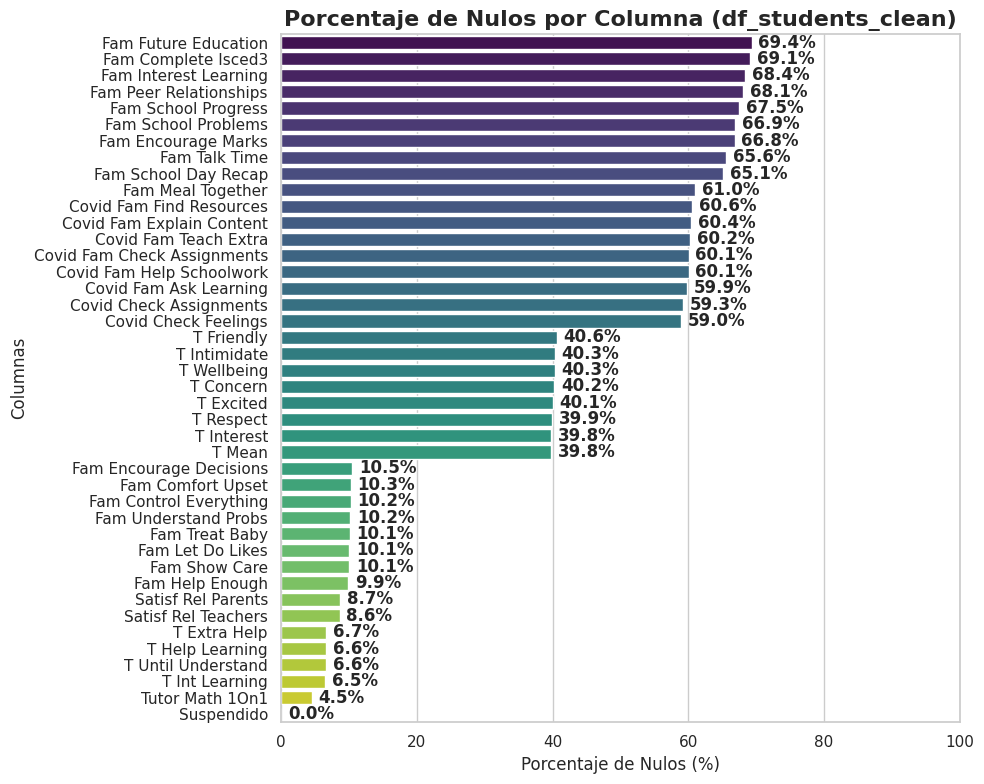

In [ ]:
# Calcular porcentaje de nulos
null_percentages = df_students_clean.isnull().mean() * 100
null_percentages = null_percentages.sort_values(ascending=False)

# Crear DataFrame para graficar
null_df = pd.DataFrame({
    'Column': null_percentages.index.str.replace('_', ' ').str.title(),  # renombra bonito
    'Null Percentage': null_percentages.values
})

# Configurar el tamaño y estilo del gráfico
plt.figure(figsize=(10, 8))
sns.set(style="whitegrid")

# Crear gráfico de barras horizontal
ax = sns.barplot(
    data=null_df,
    y='Column',
    x='Null Percentage',
    palette='viridis'
)

# Añadir etiquetas al final de cada barra
for i, value in enumerate(null_df['Null Percentage']):
    ax.text(value + 1, i, f"{value:.1f}%", va='center', fontweight='bold')

# Títulos y etiquetas
plt.title('Porcentaje de Nulos por Columna (df_students_clean)', fontsize=16, fontweight='bold')
plt.xlabel('Porcentaje de Nulos (%)', fontsize=12)
plt.ylabel('Columnas', fontsize=12)

# Limitar eje x
plt.xlim(0, 100)

plt.tight_layout()
plt.show()

In [ ]:
# revisar

for column in preguntas_seleccionadas:
    print(f"{column}: {obtener_significado(column, compendio)}")

ST267Q01JA: Agree/disagree: The teachers at my school are respectful towards me.
ST267Q02JA: Agree/disagree: If I walked into my classes upset, my teachers would be concerned about me.
ST267Q03JA: Agree/disagree: If I came back to visit my school 3 years from now, my teachers would be excited to see me.
ST267Q04JA: Agree/disagree: I feel intimidated by the teachers at my school.
ST267Q05JA: Agree/disagree: When my teachers ask how I am doing, they are really interested in my answer.
ST267Q06JA: Agree/disagree: The teachers at my school are friendly towards me.
ST267Q07JA: Agree/disagree: The teachers at my school are interested in students' well-being.
ST267Q07JA: Agree/disagree: The teachers at my school are interested in students' well-being.
ST270Q01JA: How often: The teacher shows an interest in every student's learning.
ST270Q02JA: How often: The teacher gives extra help when students need it.
ST270Q03JA: How often: The teacher helps students with their learning.
ST270Q04JA: How o

## Eliminación de registros
Solo eliminaremos registros con gran cantidad de nulos, pero si dejaremos el codigo por si necesitamos hacer el ejercicio en algun momento

In [ ]:
#Contar los valores nulos en cada fila
nulos_por_fila = df_students_clean.isnull().sum(axis=1)

# Contar cuántas filas tienen al menos 40 valores nulos
filas_con_nulos = (nulos_por_fila >= 40).sum()

# Mostrar el resultado
print(f'Número de filas con al menos 40 valores nulos: {filas_con_nulos}')

Número de filas con al menos 40 valores nulos: 976


In [ ]:
## Filtrar las filas que tienen AL menos de 40 valores nulos
df_students_clean = df_students_clean[nulos_por_fila < 40]



In [ ]:
df_students_clean.shape

(29824, 42)

In [ ]:
# Calcular número y porcentaje de nulos
nulos_info = pd.DataFrame({
    'Número de Nulos': df_students_clean.isnull().sum(),
    'Porcentaje de Nulos (%)': df_students_clean.isnull().mean() * 100
})

# Imprimir resultado
print(nulos_info)

                             Número de Nulos  Porcentaje de Nulos (%)
T_RESPECT                              11308                37.915773
T_CONCERN                              11421                38.294662
T_EXCITED                              11360                38.090129
T_INTIMIDATE                           11446                38.378487
T_INTEREST                             11279                37.818535
T_FRIENDLY                             11541                38.697023
T_WELLBEING                            11443                38.368428
T_MEAN                                 11274                37.801770
T_INT_LEARNING                          1018                 3.413358
T_EXTRA_HELP                            1078                 3.614539
T_HELP_LEARNING                         1068                 3.581009
T_UNTIL_UNDERSTAND                      1055                 3.537420
TUTOR_MATH_1ON1                          479                 1.606089
FAM_SCHOOL_PROGRESS 

##Eliminación columnas

In [ ]:

# No se eliminan por el momento
# Calcular el umbral de nulos (68%)
#umbral = 0.50

# Calcular porcentaje de nulos por columna
#nulos_porcentaje = df_students_clean.isnull().mean()

# Seleccionar columnas que tienen menos de 68% de nulos
#columnas_a_conservar = nulos_porcentaje[nulos_porcentaje < umbral].index

# Crear nuevo DataFrame sin las columnas con >=50% nulos
#df_students_clean = df_students_clean[columnas_a_conservar]



# Alta Correlación

,T_RESPECT,T_CONCERN,T_EXCITED,T_INTIMIDATE,T_INTEREST,T_FRIENDLY,T_WELLBEING,T_MEAN,T_INT_LEARNING,T_EXTRA_HELP,T_HELP_LEARNING,T_UNTIL_UNDERSTAND,TUTOR_MATH_1ON1,FAM_SCHOOL_PROGRESS,FAM_MEAL_TOGETHER,FAM_TALK_TIME,FAM_COMPLETE_ISCED3,FAM_SCHOOL_PROBLEMS,FAM_PEER_RELATIONSHIPS,FAM_ENCOURAGE_MARKS,FAM_INTEREST_LEARNING,FAM_FUTURE_EDUCATION,FAM_SCHOOL_DAY_RECAP,COVID_CHECK_ASSIGNMENTS,COVID_CHECK_FEELINGS,COVID_FAM_HELP_SCHOOLWORK,COVID_FAM_ASK_LEARNING,COVID_FAM_CHECK_ASSIGNMENTS,COVID_FAM_EXPLAIN_CONTENT,COVID_FAM_FIND_RESOURCES,COVID_FAM_TEACH_EXTRA,SATISF_REL_PARENTS,SATISF_REL_TEACHERS,FAM_HELP_ENOUGH,FAM_LET_DO_LIKES,FAM_SHOW_CARE,FAM_UNDERSTAND_PROBS,FAM_ENCOURAGE_DECISIONS,FAM_CONTROL_EVERYTHING,FAM_TREAT_BABY,FAM_COMFORT_UPSET,suspendido
T_RESPECT,1.000000,0.408854,0.407588,-0.204616,0.416082,0.584547,0.487838,-0.421900,0.254856,0.242452,0.276197,0.232650,-0.044606,0.166136,0.140700,0.165614,0.090409,0.142352,0.131619,0.146025,0.158207,0.118042,0.136972,0.112770,0.091587,0.018577,0.117837,0.048242,0.006465,0.011916,0.039132,0.153036,0.362931,0.174086,0.135144,0.160882,0.147240,0.129549,-0.035404,-0.083664,0.132476,-0.158559
T_CONCERN,0.408854,1.000000,0.432823,-0.124177,0.551743,0.408590,0.536564,-0.210244,0.251360,0.244478,0.250106,0.225181,-0.005610,0.151854,0.069449,0.138371,0.098225,0.171136,0.169423,0.152895,0.184729,0.136251,0.114197,0.162917,0.191644,0.074397,0.106024,0.066758,0.095874,0.127862,0.088596,0.166134,0.346473,0.186247,0.111829,0.165946,0.196698,0.141168,-0.003680,-0.041005,0.205410,-0.002011
T_EXCITED,0.407588,0.432823,1.000000,-0.117773,0.435425,0.414072,0.377189,-0.247721,0.190760,0.173750,0.189203,0.170781,-0.014508,0.171858,0.125404,0.165756,0.095933,0.141595,0.152884,0.169696,0.166960,0.137659,0.151328,0.124262,0.111757,0.056606,0.114383,0.041343,0.051655,0.053833,0.074801,0.146104,0.327188,0.161942,0.103318,0.158016,0.142737,0.121671,-0.000659,-0.044853,0.146238,-0.104409
T_INTIMIDATE,-0.204616,-0.124177,-0.117773,1.000000,-0.165922,-0.240147,-0.210409,0.368199,-0.144974,-0.140600,-0.156535,-0.150147,0.031591,-0.049563,-0.070752,-0.071371,-0.026719,-0.071215,-0.046725,-0.064417,-0.089928,-0.074916,-0.037927,-0.039589,-0.075478,-0.010208,-0.038380,-0.002585,-0.013252,-0.027916,-0.023830,-0.123090,-0.195847,-0.092879,-0.066714,-0.079815,-0.095561,-0.069286,0.032387,0.066192,-0.088985,-0.015950
T_INTEREST,0.416082,0.551743,0.435425,-0.165922,1.000000,0.438019,0.555602,-0.262955,0.260880,0.245344,0.252992,0.227411,-0.011364,0.166401,0.101463,0.160149,0.130195,0.185446,0.181767,0.177864,0.209764,0.177395,0.131414,0.153623,0.179724,0.076333,0.122268,0.063710,0.093902,0.084577,0.075385,0.184868,0.354211,0.200441,0.134194,0.180081,0.201065,0.151118,-0.024699,-0.077745,0.200516,-0.043580
T_FRIENDLY,0.584547,0.408590,0.414072,-0.240147,0.438019,1.000000,0.540761,-0.429234,0.253441,0.240866,0.267337,0.234686,-0.035715,0.150791,0.125327,0.143714,0.084999,0.141508,0.127717,0.133649,0.152487,0.124675,0.128710,0.118020,0.119496,0.037829,0.095897,0.044182,0.016831,0.042603,0.028150,0.162415,0.395372,0.148147,0.125174,0.130238,0.133357,0.124543,-0.045552,-0.078669,0.128299,-0.105359
T_WELLBEING,0.487838,0.536564,0.377189,-0.210409,0.555602,0.540761,1.000000,-0.333831,0.302366,0.288968,0.305136,0.267826,-0.020538,0.130323,0.092200,0.130008,0.093950,0.154374,0.153821,0.174099,0.199279,0.141442,0.115079,0.152102,0.184072,0.039134,0.084918,0.053873,0.065213,0.072702,0.066886,0.156916,0.370272,0.169095,0.101439,0.166425,0.183616,0.140774,-0.009312,-0.059419,0.163764,-0.042474
T_MEAN,-0.421900,-0.210244,-0.247721,0.368199,-0.262955,-0.429234,-0.333831,1.000000,-0.218703,-0.216416,-0.230457,-0.204929,0.056571,-0.136680,-0.107910,-0.134711,-0.034947,-0.095565,-0.092972,-0.106456,-0.117625,-0.064382,-0.127148,-0.055750,-0.029601,-0.006679,-0.085572,-0.021636,0.006117,0.013865,0.039168,-0.128327,-0.294082,-0.142343,-0.118084,-0.126117,-0.113437,-0.098584,0.077755,0.127166,-0.097858,0.142658
T_INT_LEARNING,0.254856,0.2513

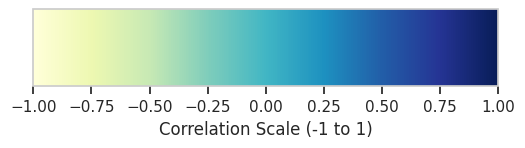

In [ ]:
# Definir la matriz de correlación
df_corr = df_students_clean.corr(numeric_only=True)

# Visualizamos la matriz de correlación como DataFrame
styled_corr = df_corr.style.background_gradient(cmap='YlGnBu').set_caption("Correlation Matrix")

# Visualizamos el DataFrame
display(styled_corr)

# Dividimos por colores
fig, ax = plt.subplots(figsize=(6, 1))
cmap = plt.get_cmap('YlGnBu')
norm = plt.Normalize(vmin=-1, vmax=1)
cb = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), cax=ax, orientation='horizontal')
cb.set_label('Correlation Scale (-1 to 1)')
plt.show()

In [ ]:
df_students_clean.head()


,T_RESPECT,T_CONCERN,T_EXCITED,T_INTIMIDATE,T_INTEREST,T_FRIENDLY,T_WELLBEING,T_MEAN,T_INT_LEARNING,T_EXTRA_HELP,T_HELP_LEARNING,T_UNTIL_UNDERSTAND,TUTOR_MATH_1ON1,FAM_SCHOOL_PROGRESS,FAM_MEAL_TOGETHER,FAM_TALK_TIME,FAM_COMPLETE_ISCED3,FAM_SCHOOL_PROBLEMS,FAM_PEER_RELATIONSHIPS,FAM_ENCOURAGE_MARKS,FAM_INTEREST_LEARNING,FAM_FUTURE_EDUCATION,FAM_SCHOOL_DAY_RECAP,COVID_CHECK_ASSIGNMENTS,COVID_CHECK_FEELINGS,COVID_FAM_HELP_SCHOOLWORK,COVID_FAM_ASK_LEARNING,COVID_FAM_CHECK_ASSIGNMENTS,COVID_FAM_EXPLAIN_CONTENT,COVID_FAM_FIND_RESOURCES,COVID_FAM_TEACH_EXTRA,SATISF_REL_PARENTS,SATISF_REL_TEACHERS,FAM_HELP_ENOUGH,FAM_LET_DO_LIKES,FAM_SHOW_CARE,FAM_UNDERSTAND_PROBS,FAM_ENCOURAGE_DECISIONS,FAM_CONTROL_EVERYTHING,FAM_TREAT_BABY,FAM_COMFORT_UPSET,suspendido
1,2.0,1.0,NaN,NaN,2.0,3.0,2.0,NaN,1.0,1.0,2.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,2.0,0
2,NaN,2.0,2.0,NaN,2.0,2.0,NaN,1.0,1.0,1.0,1.0,1.0,0.0,4.0,NaN,4.0,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,3.0,1.0,3.0,NaN,0.0,0.0,0.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,0.0,2.0,1
3,2.0,1.0,2.0,0.0,NaN,NaN,2.0,NaN,3.0,3.0,3.0,3.0,0.0,NaN,NaN,4.0,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,1.0,NaN,3.0,3.0,0.0,2.0,0.0,3.0,2.0,2.0,1.0,2.0,2.0,2.0,0.0,1.0,2.0,1
4,NaN,0.0,0.0,NaN,0.0,0.0,NaN,2.0,2.0,2.0,2.0,3.0,1.0,4.0,4.0,NaN,NaN,4.0,0.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,2.0,2.0,1.0,NaN,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,2.0,0
5,3.0,3.0,NaN,0.0,NaN,3.0,3.0,NaN,3.0,3.0,3.0,3.0,0.0,NaN,4.0,NaN,4.0,4.0,NaN,NaN,NaN,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,2.0,2.0,2.0,2.0,2.0,1.0,0.0,2.0,1


In [ ]:
# Creamos un dataframe triangulo de las correlaciones para evitar que se repitan los valores
df_triangulo = pd.DataFrame(np.triu(df_corr, k=1), columns=df_students_clean.columns)
df_triangulo.index = df_students_clean.columns
df_triangulo

,T_RESPECT,T_CONCERN,T_EXCITED,T_INTIMIDATE,T_INTEREST,T_FRIENDLY,T_WELLBEING,T_MEAN,T_INT_LEARNING,T_EXTRA_HELP,T_HELP_LEARNING,T_UNTIL_UNDERSTAND,TUTOR_MATH_1ON1,FAM_SCHOOL_PROGRESS,FAM_MEAL_TOGETHER,FAM_TALK_TIME,FAM_COMPLETE_ISCED3,FAM_SCHOOL_PROBLEMS,FAM_PEER_RELATIONSHIPS,FAM_ENCOURAGE_MARKS,FAM_INTEREST_LEARNING,FAM_FUTURE_EDUCATION,FAM_SCHOOL_DAY_RECAP,COVID_CHECK_ASSIGNMENTS,COVID_CHECK_FEELINGS,COVID_FAM_HELP_SCHOOLWORK,COVID_FAM_ASK_LEARNING,COVID_FAM_CHECK_ASSIGNMENTS,COVID_FAM_EXPLAIN_CONTENT,COVID_FAM_FIND_RESOURCES,COVID_FAM_TEACH_EXTRA,SATISF_REL_PARENTS,SATISF_REL_TEACHERS,FAM_HELP_ENOUGH,FAM_LET_DO_LIKES,FAM_SHOW_CARE,FAM_UNDERSTAND_PROBS,FAM_ENCOURAGE_DECISIONS,FAM_CONTROL_EVERYTHING,FAM_TREAT_BABY,FAM_COMFORT_UPSET,suspendido
T_RESPECT,0.0,0.408854,0.407588,-0.204616,0.416082,0.584547,0.487838,-0.421900,0.254856,0.242452,0.276197,0.232650,-0.044606,0.166136,0.140700,0.165614,0.090409,0.142352,0.131619,0.146025,0.158207,0.118042,0.136972,0.112770,0.091587,0.018577,0.117837,0.048242,0.006465,0.011916,0.039132,0.153036,0.362931,0.174086,0.135144,0.160882,0.147240,0.129549,-0.035404,-0.083664,0.132476,-0.158559
T_CONCERN,0.0,0.000000,0.432823,-0.124177,0.551743,0.408590,0.536564,-0.210244,0.251360,0.244478,0.250106,0.225181,-0.005610,0.151854,0.069449,0.138371,0.098225,0.171136,0.169423,0.152895,0.184729,0.136251,0.114197,0.162917,0.191644,0.074397,0.106024,0.066758,0.095874,0.127862,0.088596,0.166134,0.346473,0.186247,0.111829,0.165946,0.196698,0.141168,-0.003680,-0.041005,0.205410,-0.002011
T_EXCITED,0.0,0.000000,0.000000,-0.117773,0.435425,0.414072,0.377189,-0.247721,0.190760,0.173750,0.189203,0.170781,-0.014508,0.171858,0.125404,0.165756,0.095933,0.141595,0.152884,0.169696,0.166960,0.137659,0.151328,0.124262,0.111757,0.056606,0.114383,0.041343,0.051655,0.053833,0.074801,0.146104,0.327188,0.161942,0.103318,0.158016,0.142737,0.121671,-0.000659,-0.044853,0.146238,-0.104409
T_INTIMIDATE,0.0,0.000000,0.000000,0.000000,-0.165922,-0.240147,-0.210409,0.368199,-0.144974,-0.140600,-0.156535,-0.150147,0.031591,-0.049563,-0.070752,-0.071371,-0.026719,-0.071215,-0.046725,-0.064417,-0.089928,-0.074916,-0.037927,-0.039589,-0.075478,-0.010208,-0.038380,-0.002585,-0.013252,-0.027916,-0.023830,-0.123090,-0.195847,-0.092879,-0.066714,-0.079815,-0.095561,-0.069286,0.032387,0.066192,-0.088985,-0.015950
T_INTEREST,0.0,0.000000,0.000000,0.000000,0.000000,0.438019,0.555602,-0.262955,0.260880,0.245344,0.252992,0.227411,-0.011364,0.166401,0.101463,0.160149,0.130195,0.185446,0.181767,0.177864,0.209764,0.177395,0.131414,0.153623,0.179724,0.076333,0.122268,0.063710,0.093902,0.084577,0.075385,0.184868,0.354211,0.200441,0.134194,0.180081,0.201065,0.151118,-0.024699,-0.077745,0.200516,-0.043580
T_FRIENDLY,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.540761,-0.429234,0.253441,0.240866,0.267337,0.234686,-0.035715,0.150791,0.125327,0.143714,0.084999,0.141508,0.127717,0.133649,0.152487,0.124675,0.128710,0.118020,0.119496,0.037829,0.095897,0.044182,0.016831,0.042603,0.028150,0.162415,0.395372,0.148147,0.125174,0.130238,0.133357,0.124543,-0.045552,-0.078669,0.128299,-0.105359
T_WELLBEING,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.333831,0.302366,0.288968,0.305136,0.267826,-0.020538,0.130323,0.092200,0.130008,0.093950,0.154374,0.153821,0.174099,0.199279,0.141442,0.115079,0.152102,0.184072,0.039134,0.084918,0.053873,0.065213,0.072702,0.066886,0.156916,0.370272,0.169095,0.101439,0.166425,0.183616,0.140774,-0.009312,-0.059419,0.163764,-0.042474
T_MEAN,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.218703,-0.216416,-0.230457,-0.204929,0.056571,-0.136680,-0.107910,-0.134711,-0.034947,-0.095565,-0.092972,-0.106456,-0.117625,-0.064382,-0.127148,-0.055750,-0.029601,-0.006679,-0.085572,-0.021636,0.006117,0.013865,0.039168,-0.128327,-0.294082,-0.142343,-0.118084,-0.126117,-0.113437,-0.098584,0.077755,0.127166,-0.097858,0.142658
T_INT_LEARNING,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

Como vemos en la matriz, no hay correlaciones que superen el umbral del 0.9 que es el umbral aceptable para la eliminación de estas. Dejamos el codigo para futuros ejercicios

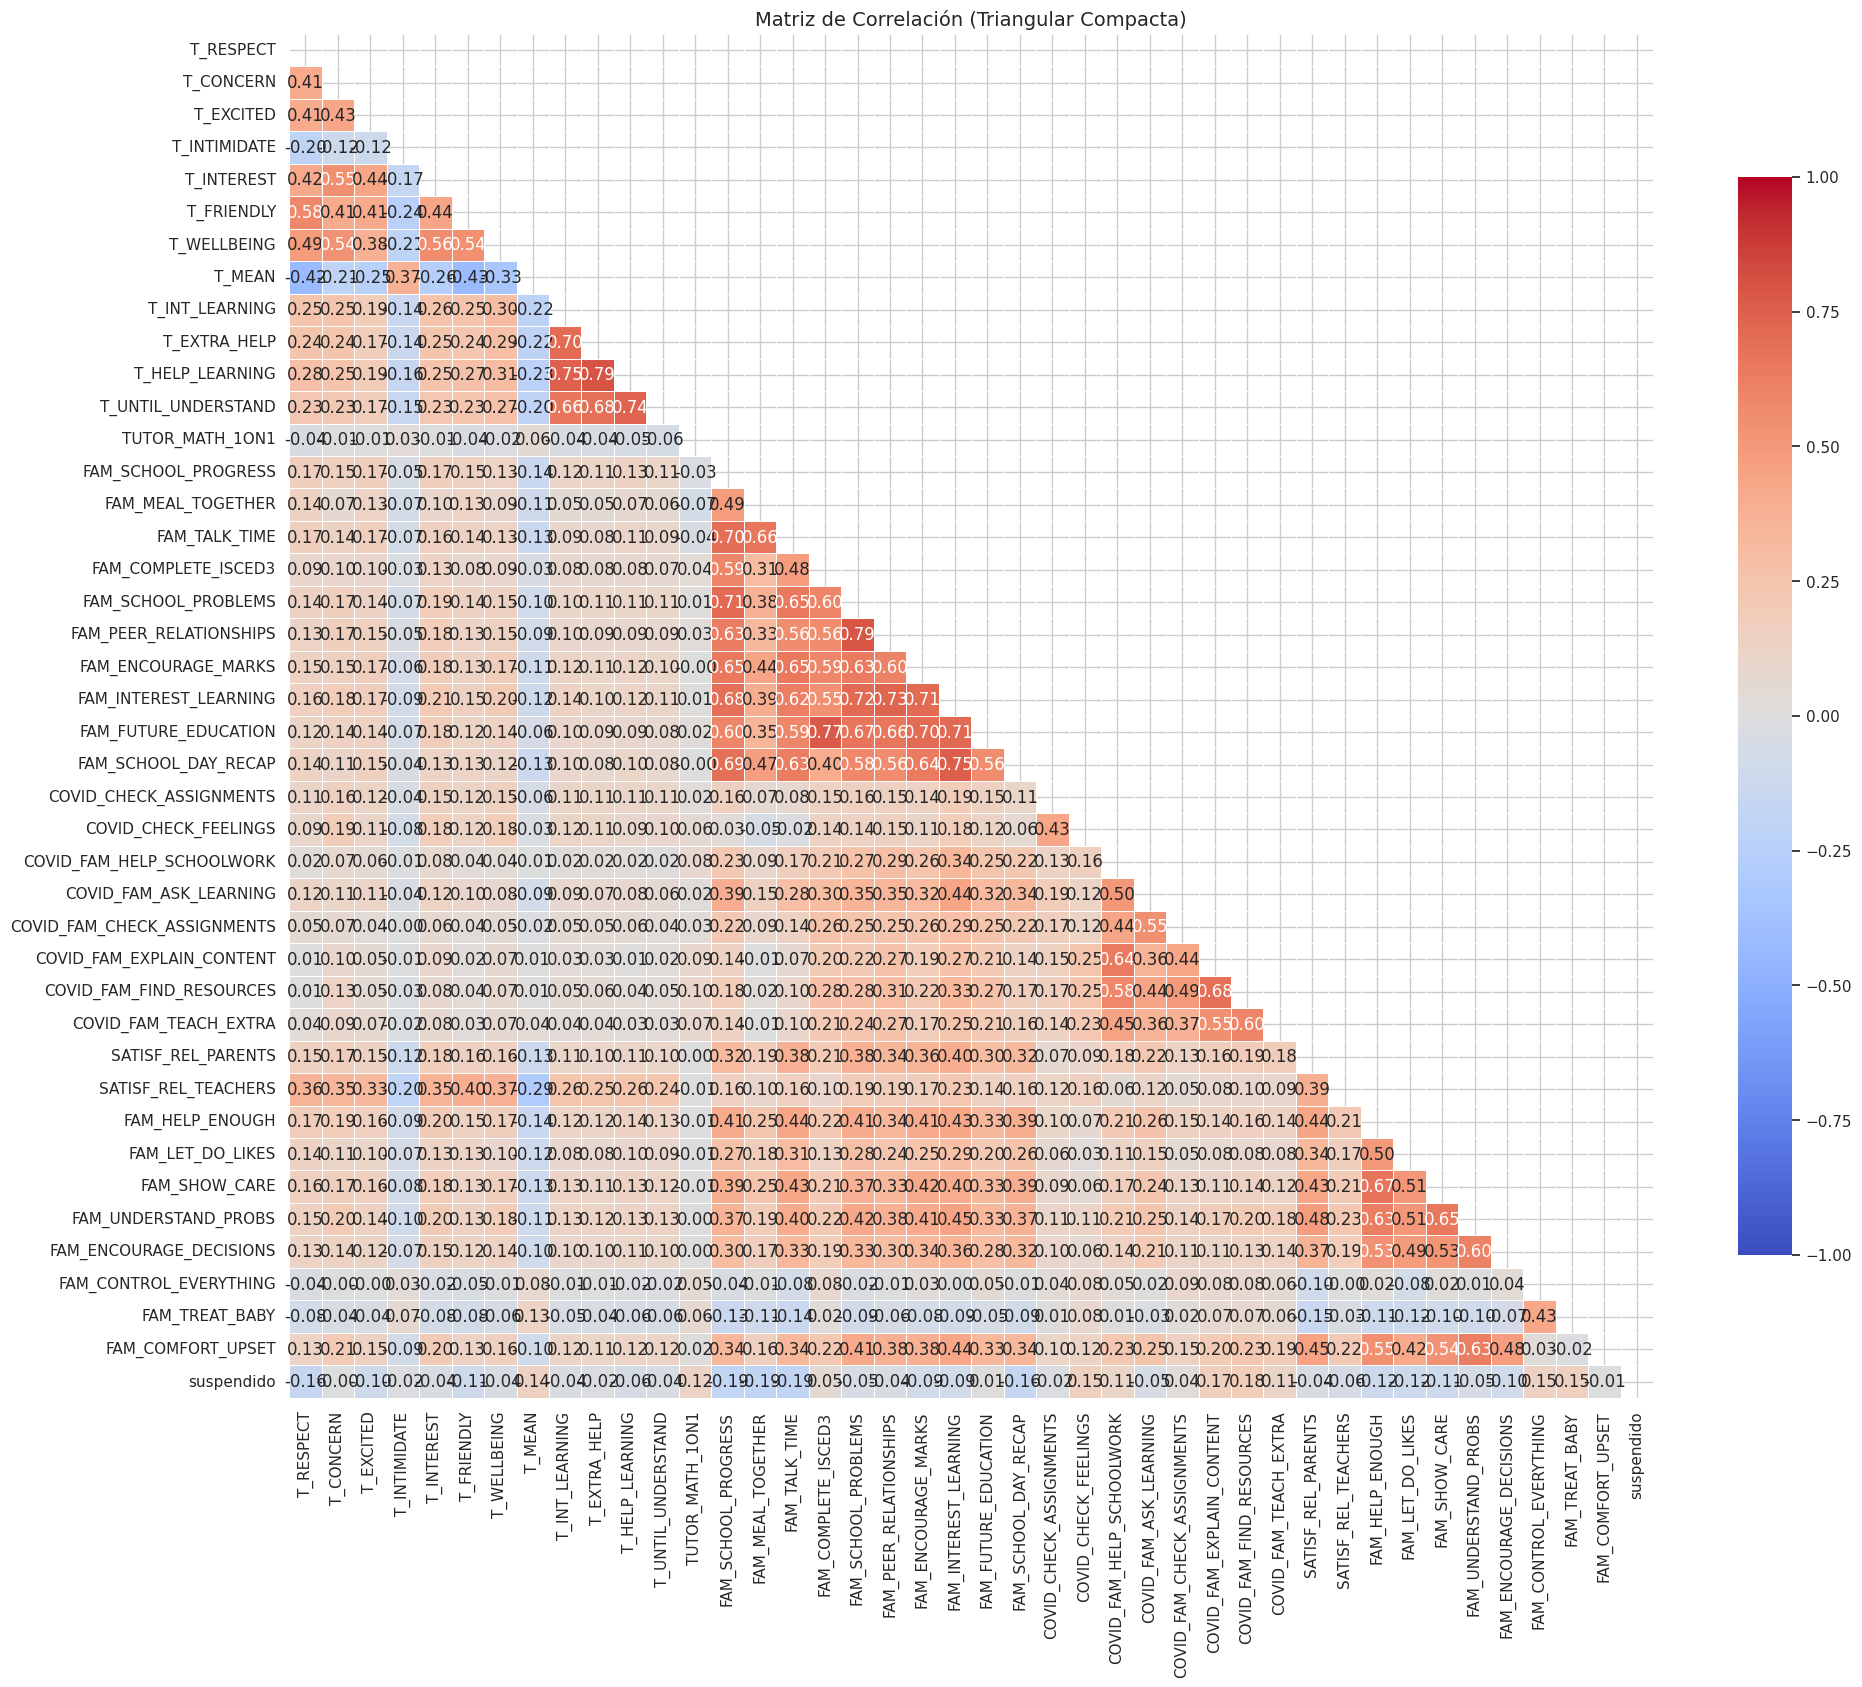

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calcular la matriz de correlación
corr = df_students_clean.corr()

# Crear la máscara para el triángulo superior
mask = np.triu(np.ones_like(corr, dtype=bool))

# Configurar la figura: tamaño compacto (ajusta si quieres)
plt.figure(figsize=(22, 28))  # prueba (8,6) o (12,10) según te guste

# Dibujar el heatmap
sns.heatmap(
    corr,
    mask=mask,
    cmap='coolwarm',       # puedes cambiar a 'viridis', 'magma', 'cividis', etc.
    vmax=1.0,
    vmin=-1.0,
    center=0,
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": 0.5},  # barra de color más compacta
    annot=True, fmt=".2f"      # valores numéricos dentro
)

plt.title('Matriz de Correlación (Triangular Compacta)', fontsize=14)
plt.show()

In [ ]:
# Seleccionamos los pares de variables cuya correlación absoluta supere el umbral de 0.9
df_altas_correlaciones = df_triangulo.stack().reset_index()
df_altas_correlaciones.columns = ['variable1', 'variable2', 'correlacion']
df_altas_correlaciones = df_altas_correlaciones[df_altas_correlaciones['correlacion'].abs() > 0.9]
df_altas_correlaciones.head(5)

,variable1,variable2,correlacion


In [ ]:
# Sacamos las correlaciones de las variables con la target
corr_con_target = df_students_clean.corr()['suspendido']
corr_con_target

,suspendido
T_RESPECT,-0.158559
T_CONCERN,-0.002011
T_EXCITED,-0.104409
T_INTIMIDATE,-0.015950
T_INTEREST,-0.043580
T_FRIENDLY,-0.105359
T_WELLBEING,-0.042474
T_MEAN,0.142658
T_INT_LEARNING,-0.037563
T_EXTRA_HELP,-0.015688


# Baja Varianza

In [ ]:
varianza= df_students_clean.var()
# Encontrar la columna con la varianza más alta
columna_max_varianza = varianza.idxmax()
valor_max_varianza = varianza.max()
# Encontrar la columna con la varianza más baja
columna_min_varianza = varianza.idxmin()
valor_min_varianza = varianza.min()
# Mostrar resultados
print(f'Columna con la mayor varianza: {columna_max_varianza}')
print(f'Valor de la varianza: {valor_max_varianza}')
print(f'Columna con la menor varianza: {columna_min_varianza}')
print(f'Valor de la menor varianza: {valor_min_varianza}')

Columna con la mayor varianza: FAM_PEER_RELATIONSHIPS
Valor de la varianza: 2.374069866920037
Columna con la menor varianza: TUTOR_MATH_1ON1
Valor de la menor varianza: 0.1460923966433621


In [ ]:
varianza.sort_values()

,0
TUTOR_MATH_1ON1,0.146092
suspendido,0.249609
FAM_SHOW_CARE,0.294834
FAM_LET_DO_LIKES,0.347248
FAM_HELP_ENOUGH,0.349069
T_FRIENDLY,0.404462
FAM_ENCOURAGE_DECISIONS,0.416619
FAM_UNDERSTAND_PROBS,0.449127
FAM_TREAT_BABY,0.479756
SATISF_REL_TEACHERS,0.485136


In [ ]:
var_poca_varianza = []
print('baja varianza:')

for col in df_students_clean.columns:
  if df_students_clean[col].var() < 0.01:
    print(col, df_students_clean[col].var())
    var_poca_varianza.append(col)
print('eliminar', var_poca_varianza)
print('cantidad', len(var_poca_varianza))

baja varianza:
eliminar []
cantidad 0


# Modelado

## Split Train-Test

In [ ]:
# Definir las características (X) y la variable objetivo (y)
X = df_students_clean.drop('suspendido', axis=1)
y = df_students_clean['suspendido']

In [ ]:
# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
print('nº observaciones de train:', len(y_train))
print('nº observaciones de test: ', len(y_test))

nº observaciones de train: 20876
nº observaciones de test:  8948


#Imputacion

In [ ]:
from sklearn.experimental import enable_iterative_imputer  # habilita IterativeImputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# 1️⃣ Escalar (solo fit en train)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2️⃣ Imputar con IterativeImputer (solo fit en train escalado)
iter_imputer = IterativeImputer(random_state=42, max_iter=10)

# Ajustamos solo en train para evitar leakage
X_train_imputed_scaled = iter_imputer.fit_transform(X_train_scaled)

# Transformamos test usando el imputador entrenado en train
X_test_imputed_scaled = iter_imputer.transform(X_test_scaled)

# 3️⃣ Desescalar (volver a los valores originales)
X_train_final = scaler.inverse_transform(X_train_imputed_scaled)
X_test_final = scaler.inverse_transform(X_test_imputed_scaled)

# 4️⃣ Convertir de nuevo a DataFrame
X_train = pd.DataFrame(X_train_final, columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(X_test_final, columns=X_test.columns, index=X_test.index)

print("✅ Imputación IterativeImputer completa sin leakage.")

✅ Imputación IterativeImputer completa sin leakage.


In [ ]:
X_train.head()


,T_RESPECT,T_CONCERN,T_EXCITED,T_INTIMIDATE,T_INTEREST,T_FRIENDLY,T_WELLBEING,T_MEAN,T_INT_LEARNING,T_EXTRA_HELP,T_HELP_LEARNING,T_UNTIL_UNDERSTAND,TUTOR_MATH_1ON1,FAM_SCHOOL_PROGRESS,FAM_MEAL_TOGETHER,FAM_TALK_TIME,FAM_COMPLETE_ISCED3,FAM_SCHOOL_PROBLEMS,FAM_PEER_RELATIONSHIPS,FAM_ENCOURAGE_MARKS,FAM_INTEREST_LEARNING,FAM_FUTURE_EDUCATION,FAM_SCHOOL_DAY_RECAP,COVID_CHECK_ASSIGNMENTS,COVID_CHECK_FEELINGS,COVID_FAM_HELP_SCHOOLWORK,COVID_FAM_ASK_LEARNING,COVID_FAM_CHECK_ASSIGNMENTS,COVID_FAM_EXPLAIN_CONTENT,COVID_FAM_FIND_RESOURCES,COVID_FAM_TEACH_EXTRA,SATISF_REL_PARENTS,SATISF_REL_TEACHERS,FAM_HELP_ENOUGH,FAM_LET_DO_LIKES,FAM_SHOW_CARE,FAM_UNDERSTAND_PROBS,FAM_ENCOURAGE_DECISIONS,FAM_CONTROL_EVERYTHING,FAM_TREAT_BABY,FAM_COMFORT_UPSET
23119,2.000000,1.000000,2.00000,1.000000,1.380391,2.000000,1.582375,0.801373,1.0,1.0,1.0,1.0,0.0,2.125119,3.064628,2.366738,2.000000,2.000000,1.979599,2.060657,2.000000,1.000000,2.000000,1.734183,1.030567,0.997805,1.532825,1.310218,1.133269,1.050355,0.973459,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0
13414,2.099738,1.879669,2.00000,1.000000,2.000000,2.000000,2.000000,0.696017,2.0,2.0,2.0,2.0,0.0,2.000000,2.000000,2.000000,2.000000,2.125940,1.708791,2.000000,1.956284,2.423329,1.878890,1.473953,1.273186,1.035295,1.614608,1.379583,1.072270,1.101373,1.290417,2.0,2.0,2.0,2.0,2.0,1.0,2.0,0.0,0.0,2.0
19082,3.000000,2.000000,2.46855,1.000000,2.000000,2.774339,2.317852,0.000000,1.0,2.0,1.0,2.0,0.0,3.157791,3.614613,3.477244,2.371716,2.765456,2.539501,3.157370,2.801796,2.694870,3.351980,1.815296,1.030499,1.167769,1.749558,1.462237,0.911661,0.967968,0.932910,2.0,3.0,2.0,2.0,2.0,2.0,2.0,0.0,1.0,1.0
422,3.000000,2.000000,2.00000,0.625892,2.000000,2.429245,2.000000,0.426785,1.0,2.0,2.0,2.0,0.0,3.992262,3.904234,4.000000,4.000000,4.000000,4.000000,4.273338,4.105066,4.000000,4.180374,2.000000,1.490573,2.818268,2.733947,3.000000,3.000000,3.052287,3.000000,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.0,1.0
6777,2.000000,1.000000,1.00000,1.000000,1.155547,2.000000,1.689511,0.845189,1.0,3.0,2.0,1.0,0.0,3.084118,4.000000,3.890202,2.000000,2.609711,2.000000,3.221056,2.604601,2.472151,3.770192,0.000000,-0.053398,0.717778,1.000000,0.000000,0.000000,0.021738,0.025612,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0


In [ ]:
X_train.head()

,T_RESPECT,T_CONCERN,T_EXCITED,T_INTIMIDATE,T_INTEREST,T_FRIENDLY,T_WELLBEING,T_MEAN,T_INT_LEARNING,T_EXTRA_HELP,T_HELP_LEARNING,T_UNTIL_UNDERSTAND,TUTOR_MATH_1ON1,FAM_SCHOOL_PROGRESS,FAM_MEAL_TOGETHER,FAM_TALK_TIME,FAM_COMPLETE_ISCED3,FAM_SCHOOL_PROBLEMS,FAM_PEER_RELATIONSHIPS,FAM_ENCOURAGE_MARKS,FAM_INTEREST_LEARNING,FAM_FUTURE_EDUCATION,FAM_SCHOOL_DAY_RECAP,COVID_CHECK_ASSIGNMENTS,COVID_CHECK_FEELINGS,COVID_FAM_HELP_SCHOOLWORK,COVID_FAM_ASK_LEARNING,COVID_FAM_CHECK_ASSIGNMENTS,COVID_FAM_EXPLAIN_CONTENT,COVID_FAM_FIND_RESOURCES,COVID_FAM_TEACH_EXTRA,SATISF_REL_PARENTS,SATISF_REL_TEACHERS,FAM_HELP_ENOUGH,FAM_LET_DO_LIKES,FAM_SHOW_CARE,FAM_UNDERSTAND_PROBS,FAM_ENCOURAGE_DECISIONS,FAM_CONTROL_EVERYTHING,FAM_TREAT_BABY,FAM_COMFORT_UPSET
23119,2.000000,1.000000,2.00000,1.000000,1.380391,2.000000,1.582375,0.801373,1.0,1.0,1.0,1.0,0.0,2.125119,3.064628,2.366738,2.000000,2.000000,1.979599,2.060657,2.000000,1.000000,2.000000,1.734183,1.030567,0.997805,1.532825,1.310218,1.133269,1.050355,0.973459,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0
13414,2.099738,1.879669,2.00000,1.000000,2.000000,2.000000,2.000000,0.696017,2.0,2.0,2.0,2.0,0.0,2.000000,2.000000,2.000000,2.000000,2.125940,1.708791,2.000000,1.956284,2.423329,1.878890,1.473953,1.273186,1.035295,1.614608,1.379583,1.072270,1.101373,1.290417,2.0,2.0,2.0,2.0,2.0,1.0,2.0,0.0,0.0,2.0
19082,3.000000,2.000000,2.46855,1.000000,2.000000,2.774339,2.317852,0.000000,1.0,2.0,1.0,2.0,0.0,3.157791,3.614613,3.477244,2.371716,2.765456,2.539501,3.157370,2.801796,2.694870,3.351980,1.815296,1.030499,1.167769,1.749558,1.462237,0.911661,0.967968,0.932910,2.0,3.0,2.0,2.0,2.0,2.0,2.0,0.0,1.0,1.0
422,3.000000,2.000000,2.00000,0.625892,2.000000,2.429245,2.000000,0.426785,1.0,2.0,2.0,2.0,0.0,3.992262,3.904234,4.000000,4.000000,4.000000,4.000000,4.273338,4.105066,4.000000,4.180374,2.000000,1.490573,2.818268,2.733947,3.000000,3.000000,3.052287,3.000000,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.0,1.0
6777,2.000000,1.000000,1.00000,1.000000,1.155547,2.000000,1.689511,0.845189,1.0,3.0,2.0,1.0,0.0,3.084118,4.000000,3.890202,2.000000,2.609711,2.000000,3.221056,2.604601,2.472151,3.770192,0.000000,-0.053398,0.717778,1.000000,0.000000,0.000000,0.021738,0.025612,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0


## Rebalanceo del train

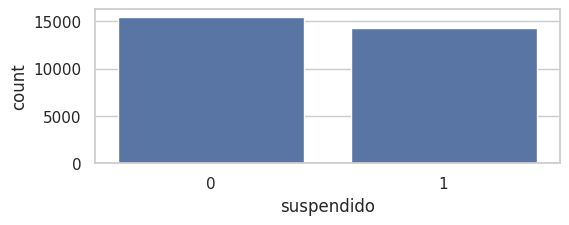

In [ ]:
fig, ax = plt.subplots(figsize=(6, 2))
sns.countplot(data=df_students_clean, x='suspendido')
plt.show()

In [ ]:
# valores absolutos de cada clase de la target
y_train.value_counts()

,count
suspendido,
0,10863
1,10013


In [ ]:
# proporción de cada clase de la target
y_train.value_counts(normalize=True)

,proportion
suspendido,
0,0.520358
1,0.479642


### Balanceado

In [ ]:
# y_train_0.value_counts()

## Estandarización

Guardo las columnas del dataset en una lista antes de estandarizar.

El metodo scaler quita el nombre de las variables


In [ ]:
variables_entrenadas = X.columns

## Competición de modelos

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

# Lista de modelos
modelos = []

# Modelos de reglas
modelos.append(('XGBClassifier', XGBClassifier(random_state=42, verbosity=0)))
modelos.append(('CatBoostClassifier', CatBoostClassifier(verbose=False, random_seed=42)))
modelos.append(('HistGradientBoostingClassifier', HistGradientBoostingClassifier(random_state=42)))


# Modelos de ML
modelos.append(('LogisticRegression', LogisticRegression(random_state=42)))
modelos.append(('SVC', SVC(random_state=42)))


##Cross-Validation para seleccionar modelo

In [ ]:
from sklearn.model_selection import cross_val_score
import pandas as pd

# Evaluar cada modelo
resultados = []
n_splits = 5  # Número de splits para cross-validation

for nombre, modelo in modelos:
    scores = cross_val_score(modelo, X_train, y_train, cv=n_splits, scoring='accuracy')
    resultados.append((nombre, scores.mean(), scores.std()))

# Crear un DataFrame para mostrar los resultados
resultados_df = pd.DataFrame(resultados, columns=['Modelo', 'Precisión Media', 'Desviación Estándar'])
print(resultados_df)

                           Modelo  Precisión Media  Desviación Estándar
0                   XGBClassifier         0.657597             0.004832
1              CatBoostClassifier         0.676614             0.012020
2  HistGradientBoostingClassifier         0.674028             0.008100
3              LogisticRegression         0.651227             0.008212
4                             SVC         0.667801             0.009820


##Metricas de modelos sobre el test

In [ ]:
import pandas as pd
from sklearn import metrics

metricas_modelos = pd.DataFrame(columns=['modelo', 'F1'])
model_params = {}

for nombre, modelo in modelos:
    # Entrenamos el modelo
    modelo.fit(X_train, y_train)

    # Predicción en el dataset de test
    y_pred = modelo.predict(X_test)

    # Calculamos el F1 Score
    f1 = metrics.f1_score(y_test, y_pred)

    # Guardamos el resultado
    metricas_modelos = pd.concat([metricas_modelos,
                                  pd.DataFrame({'modelo': nombre, 'F1': f1}, index=[0])
                                  ])

    # Guardamos los parámetros del modelo
    model_params[nombre] = modelo.get_params()

# Mostrar los modelos ordenados por F1 Score
print(metricas_modelos.sort_values('F1', ascending=False))

                           modelo        F1
0              CatBoostClassifier  0.660520
0  HistGradientBoostingClassifier  0.659695
0                   XGBClassifier  0.647526
0                             SVC  0.636874
0              LogisticRegression  0.623869


# Hiperparametrización

In [ ]:
# vemos cuales son los parámetros por defecto con los que se ha entrenado el modelo

print(model_params['CatBoostClassifier'])

{'random_seed': 42, 'verbose': False}


# Entrenamiento del modelo final

In [ ]:
note = input('Escribe una descripción de lo que has probado en esta ejecución:')

Escribe una descripción de lo que has probado en esta ejecución:final logs


In [ ]:
# import mlflow.sklearn
mlflow.set_experiment("classification_experiment")
mlflow.autolog()



2025/06/09 13:08:50 INFO mlflow.tracking.fluent: Autologging successfully enabled for lightgbm.
2025/06/09 13:08:51 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/06/09 13:08:52 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/06/09 13:08:52 INFO mlflow.tracking.fluent: Autologging successfully enabled for xgboost.
2025/06/09 13:08:52 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2025/06/09 13:08:52 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


In [ ]:
import mlflow
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score
from catboost import CatBoostClassifier

with mlflow.start_run():
    mlflow.set_tag("mlflow.note.content", note)

    # Modelo con hiperparámetros por defecto (solo random_state y verbose modificados)
    model = CatBoostClassifier(random_state=42, verbose=0)

    # Entrenamiento
    model.fit(X_train, y_train)

    # Predicciones en train
    y_train_pred = model.predict(X_train)
    y_train_pred_proba = model.predict_proba(X_train)[:, 1]

    # Predicciones en test
    y_test_pred = model.predict(X_test)
    y_test_pred_proba = model.predict_proba(X_test)[:, 1]

    # Métricas
    f1 = f1_score(y_test, y_test_pred, average='weighted')
    auc = roc_auc_score(y_test, y_test_pred_proba)
    acc = accuracy_score(y_test, y_test_pred)

    # Log de métricas en MLflow
    mlflow.log_metric("f1_score", f1)
    mlflow.log_metric("auc", auc)
    mlflow.log_metric("accuracy", acc)

    # Guardar el modelo en MLflow
    mlflow.catboost.log_model(model, "model")

    print(f"✅ F1: {f1:.3f}, AUC: {auc:.3f}, Accuracy: {acc:.3f}")

2025/06/09 13:09:27 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ F1: 0.683, AUC: 0.750, Accuracy: 0.683


In [ ]:
print(type(model))

<class 'catboost.core.CatBoostClassifier'>


#Feature Importance


2025/06/09 13:09:27 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '0084db90ee3b459581f36e03e73dad44', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current xgboost workflow


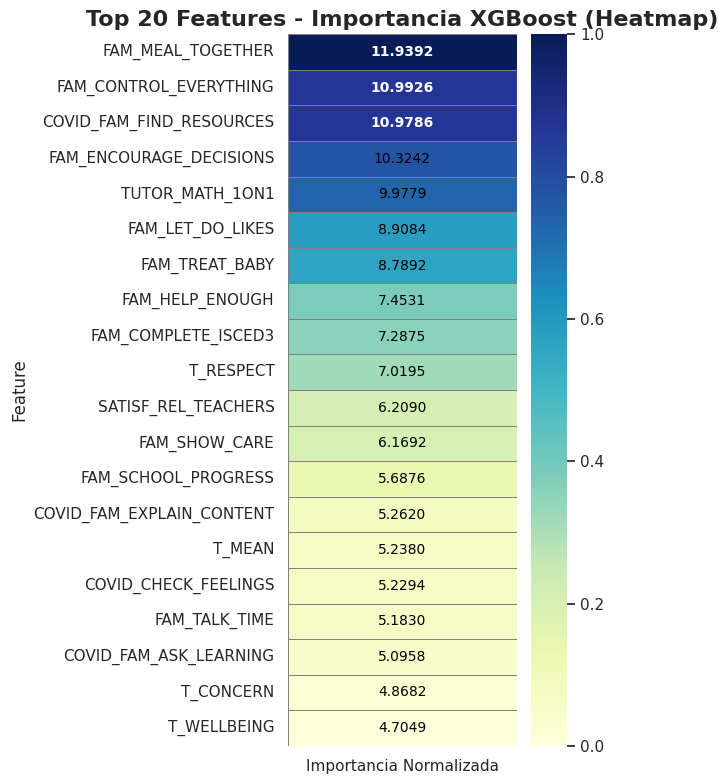

In [ ]:
import xgboost as xgb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Entrenar modelo XGBoostClassifier
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Obtener importancias (feature importance, usando 'gain')
importances = xgb_model.get_booster().get_score(importance_type='gain')

# Convertir el diccionario a DataFrame
importance_df = pd.DataFrame(importances.items(), columns=['Feature', 'Importance'])

# Ordenar y tomar top 20
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(20).reset_index(drop=True)

# Normalizar importancia para heatmap (0 a 1)
importance_df['Importance_norm'] = (importance_df['Importance'] - importance_df['Importance'].min()) / (importance_df['Importance'].max() - importance_df['Importance'].min())

# Preparar datos para heatmap: DataFrame con 1 columna, index=features
heatmap_data = importance_df.set_index('Feature')[['Importance_norm']]

plt.figure(figsize=(6, 8))
sns.set_style("whitegrid")

ax = sns.heatmap(
    heatmap_data,
    annot=False,  # anotaciones manuales abajo
    fmt='.4f',
    cmap='YlGnBu',
    cbar=True,
    linewidths=0.5,
    linecolor='gray',
    yticklabels=True,
    xticklabels=['Importancia Normalizada'],
)

# Añadir anotaciones manualmente con color condicional
for i, (imp, feat) in enumerate(zip(importance_df['Importance'], importance_df['Feature'])):
    color = 'white' if i < 3 else 'black'  # texto blanco para top 3
    ax.text(
        x=0.5,  # mitad de la celda en X (heatmap tiene solo 1 columna)
        y=i + 0.5,  # centrar en la fila
        s=f"{imp:.4f}",
        ha='center',
        va='center',
        color=color,
        fontsize=10,
        fontweight='bold' if i < 3 else 'normal'
    )

plt.title('Top 20 Features - Importancia XGBoost (Heatmap)', fontsize=16, weight='bold')
plt.ylabel('Feature')
plt.xlabel('')

plt.tight_layout()
plt.show()

##AUC

In [ ]:
# auc train
auc_train = metrics.roc_auc_score(y_train, y_train_pred_proba)
print('auc train:', round(auc_train,4))

auc train: 0.8836


In [ ]:
# auc_test
auc_test = metrics.roc_auc_score(y_test, y_test_pred_proba)
print('auc test:', round(auc_test,4))

auc test: 0.7503


### ROC Curve

In [ ]:
# metricas para la curva ROC
fpr_train, tpr_train, _ = metrics.roc_curve(y_train, y_train_pred_proba)
fpr_test, tpr_test, _ = metrics.roc_curve(y_test, y_test_pred_proba)

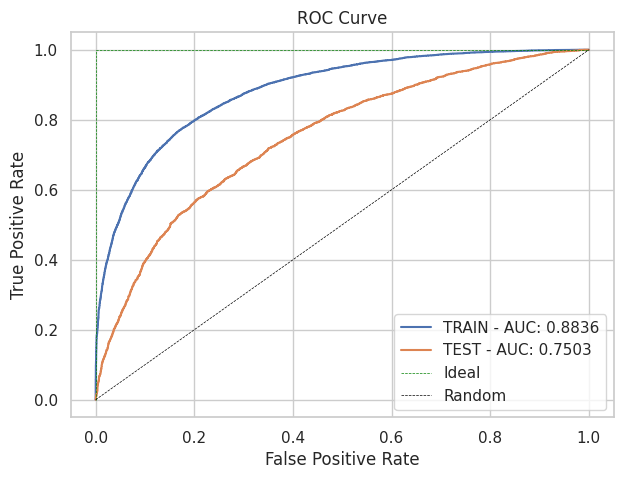

In [ ]:
#Plot
plt.figure(figsize=[7,5])
plt.plot(fpr_train, tpr_train, label='TRAIN - AUC: {:.4f}'.format(auc_train))
plt.plot(fpr_test, tpr_test, label='TEST - AUC: {:.4f}'.format(auc_test))
plt.title('ROC Curve')
plt.plot([0,0,1],[0,1,1], color='green', linestyle='--', linewidth=0.5, label='Ideal')
plt.plot([0, 1], [0, 1], color='black', linestyle='--', linewidth=0.5, label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

## Matriz de confusión

In [ ]:
# creamos la matriz de confusión
cm_test = metrics.confusion_matrix(y_test, y_test_pred)

[]

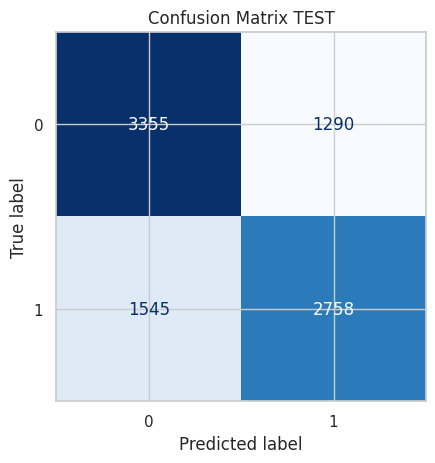

In [ ]:
# gráfico de la matriz de confusión en cantidades
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp.plot(colorbar = False, cmap = 'Blues')

plt.title('Confusion Matrix TEST')
plt.plot()

[]

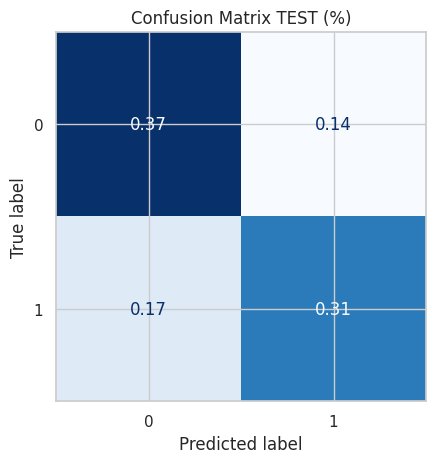

In [ ]:
# gráfico de la matriz de confusión en %
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_test/len(y_test))
disp.plot(colorbar = False, cmap = 'Blues')

plt.title('Confusion Matrix TEST (%)')
plt.plot()

## F1_score

In [ ]:
f1_score_sklearn = metrics.f1_score(y_test, y_test_pred)

In [ ]:
print('f1_score:', round(f1_score_sklearn, 4))

f1_score: 0.6605


In [ ]:
import pickle

# guardamos modelo
pickle.dump(modelo, open('predecir_suspende.p', 'wb')) # esto lo deja guardado temporalmente en colab, a la izquierda, hay que descargarlo

In [ ]:
# creamos un dataframe con los datos de X_test y las variables como columnas (por eso las guardamos antes)
df_X_test = pd.DataFrame(X_test, columns=variables_entrenadas)
df_X_test.head(5)

,T_RESPECT,T_CONCERN,T_EXCITED,T_INTIMIDATE,T_INTEREST,T_FRIENDLY,T_WELLBEING,T_MEAN,T_INT_LEARNING,T_EXTRA_HELP,T_HELP_LEARNING,T_UNTIL_UNDERSTAND,TUTOR_MATH_1ON1,FAM_SCHOOL_PROGRESS,FAM_MEAL_TOGETHER,FAM_TALK_TIME,FAM_COMPLETE_ISCED3,FAM_SCHOOL_PROBLEMS,FAM_PEER_RELATIONSHIPS,FAM_ENCOURAGE_MARKS,FAM_INTEREST_LEARNING,FAM_FUTURE_EDUCATION,FAM_SCHOOL_DAY_RECAP,COVID_CHECK_ASSIGNMENTS,COVID_CHECK_FEELINGS,COVID_FAM_HELP_SCHOOLWORK,COVID_FAM_ASK_LEARNING,COVID_FAM_CHECK_ASSIGNMENTS,COVID_FAM_EXPLAIN_CONTENT,COVID_FAM_FIND_RESOURCES,COVID_FAM_TEACH_EXTRA,SATISF_REL_PARENTS,SATISF_REL_TEACHERS,FAM_HELP_ENOUGH,FAM_LET_DO_LIKES,FAM_SHOW_CARE,FAM_UNDERSTAND_PROBS,FAM_ENCOURAGE_DECISIONS,FAM_CONTROL_EVERYTHING,FAM_TREAT_BABY,FAM_COMFORT_UPSET
26158,1.954561,1.000000,2.000000,1.000000,1.684236,2.094236,2.000000,1.0,2.0,1.0,1.0,1.0,0.0,3.719657,4.000000,3.688621,3.482776,3.922414,4.0,4.000000,3.844581,4.000000,4.000000,1.579926,0.905586,1.000000,1.389125,1.000000,1.000000,1.000000,1.000000,1.0,2.0,2.0,2.0,2.0,2.0,2.000000e+00,1.0,0.0,2.0
28969,3.000000,3.000000,2.626403,0.219691,2.000000,2.766985,3.000000,0.0,3.0,3.0,3.0,3.0,0.0,3.788220,4.000000,4.303627,3.355157,4.000000,4.0,4.091965,4.000000,3.524235,4.000000,2.006786,2.000000,1.000000,1.000000,1.005510,1.135668,1.000000,2.000000,2.0,2.0,2.0,1.0,2.0,2.0,2.220446e-16,1.0,1.0,2.0
10482,2.000000,1.000000,1.692757,0.000000,1.000000,1.802908,1.431611,1.0,2.0,1.0,1.0,0.0,0.0,3.219437,4.000000,3.741467,2.000000,3.536322,4.0,3.437268,3.426403,2.715366,4.012713,0.000000,-0.046438,1.482958,2.000000,2.000000,1.000000,1.340862,2.000000,2.0,1.0,2.0,2.0,2.0,2.0,2.000000e+00,2.0,0.0,2.0
29820,3.000000,2.000000,2.474445,0.000000,2.282317,3.000000,2.576860,0.0,2.0,2.0,2.0,3.0,1.0,4.000000,3.887877,4.110698,2.858051,3.242555,2.0,3.865300,4.000000,3.299396,4.000000,1.887429,1.146139,1.428639,2.096902,1.469723,1.141590,1.180704,1.168979,3.0,2.0,2.0,2.0,2.0,2.0,2.000000e+00,0.0,0.0,2.0
19546,2.000000,2.150545,1.751139,0.616182,2.000000,2.000000,3.000000,1.0,2.0,2.0,2.0,0.0,0.0,0.000000,2.071791,1.707949,0.000000,0.000000,0.0,0.730712,0.000000,0.436387,0.205052,0.000000,1.000000,0.000000,-0.124835,0.000000,0.376969,1.000000,1.000000,2.0,2.0,2.0,2.0,2.0,2.0,2.220446e-16,1.0,0.0,1.0


## Shap Values

In [ ]:
print(type(modelo))

<class 'sklearn.svm._classes.SVC'>


In [ ]:
print(type(modelo))

<class 'sklearn.svm._classes.SVC'>


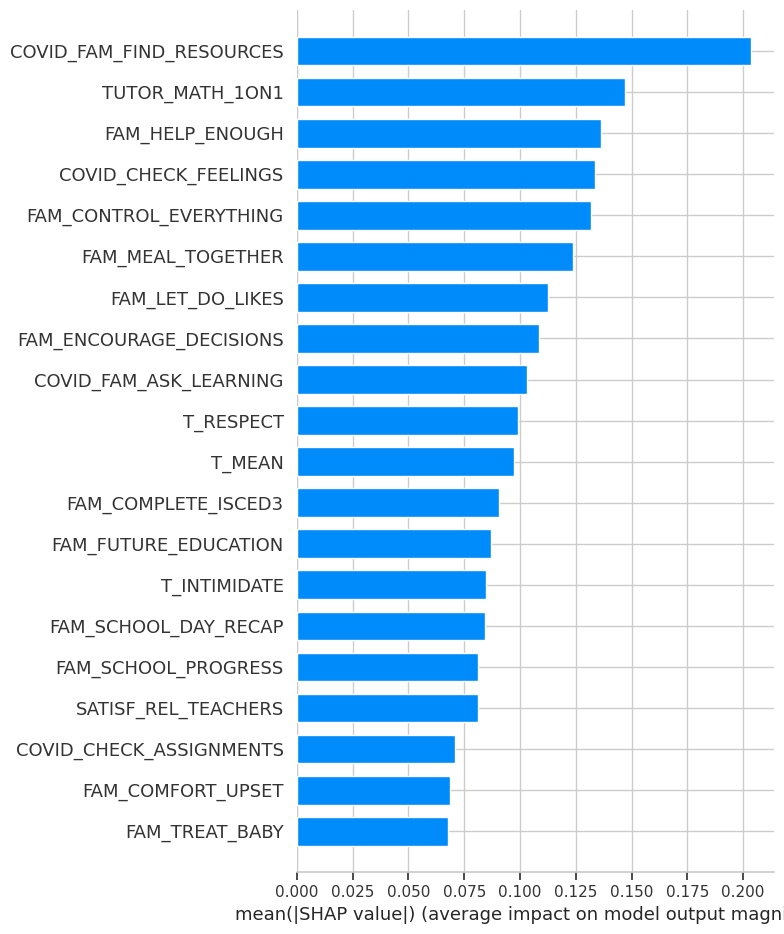

In [ ]:
#SHAP value: peso en el output final
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(df_X_test)
plt.title('SHAP values')
shap.summary_plot(shap_values, df_X_test, plot_type="bar", max_display=20)

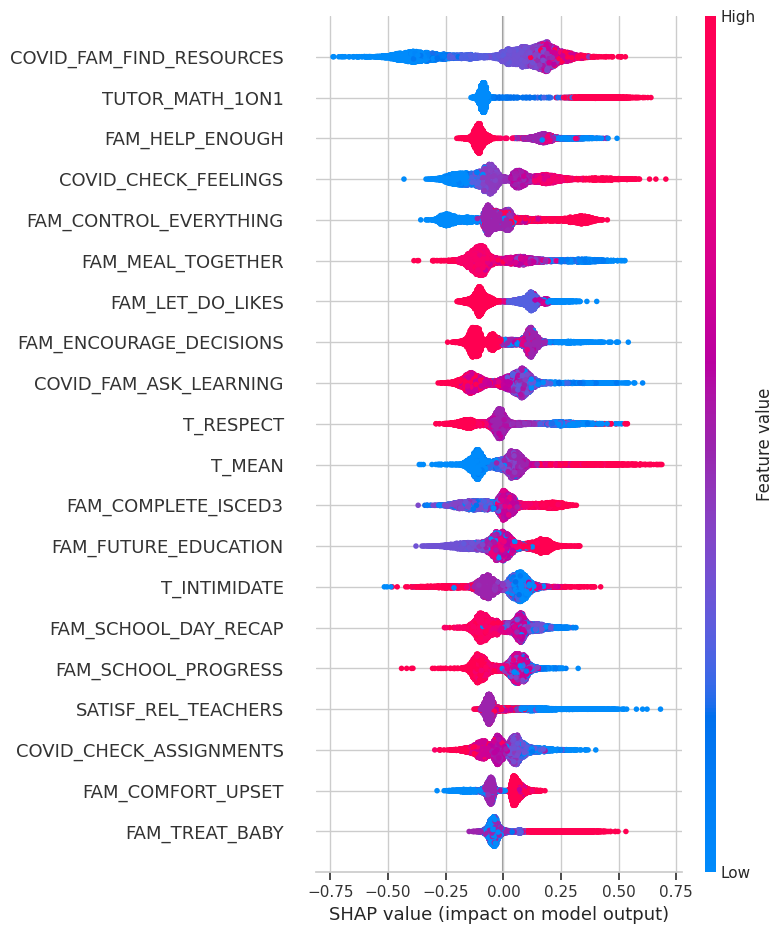

In [ ]:
shap.summary_plot(shap_values, df_X_test)

SHAP + F1_SCORE

Top 10 combined features (XGBoost gain + SHAP importance):
                     feature  gain_importance  shap_importance  combined_rank
29  COVID_FAM_FIND_RESOURCES         5.466576         0.203691            1.0
14         FAM_MEAL_TOGETHER         4.450664         0.123811            4.0
24      COVID_CHECK_FEELINGS         3.447820         0.133635            4.0
38    FAM_CONTROL_EVERYTHING         3.260549         0.131879            5.5
0                  T_RESPECT         3.428247         0.099192            7.5
21      FAM_FUTURE_EDUCATION         3.493073         0.086984            8.0
26    COVID_FAM_ASK_LEARNING         3.166710         0.103344            9.0
3               T_INTIMIDATE         3.254828         0.084700           10.5
16       FAM_COMPLETE_ISCED3         2.919910         0.090719           11.5
7                     T_MEAN         2.899721         0.097511           11.5


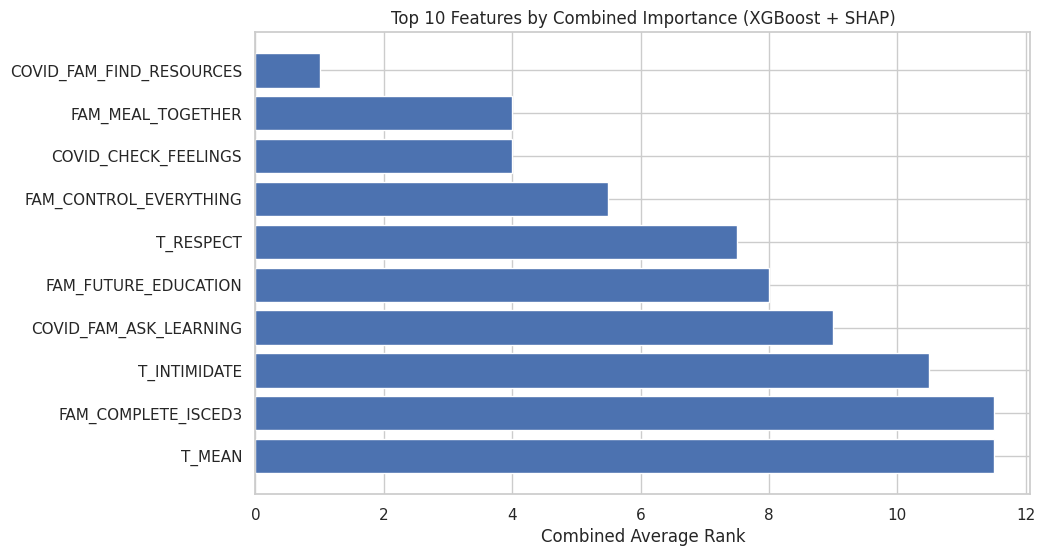

In [ ]:
# XGBoost importance (gain)
xgb_importances = model.feature_importances_
feature_names = X.columns

df_xgb_importance = pd.DataFrame({
    'feature': feature_names,
    'gain_importance': xgb_importances
})
df_xgb_importance['gain_rank'] = df_xgb_importance['gain_importance'].rank(ascending=False)

# SHAP importance (mean absolute SHAP value)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(df_X_test)
shap_mean_abs = np.abs(shap_values).mean(axis=0)

df_shap_importance = pd.DataFrame({
    'feature': df_X_test.columns,
    'shap_importance': shap_mean_abs
})
df_shap_importance['shap_rank'] = df_shap_importance['shap_importance'].rank(ascending=False)

# Merge the two
df_combined = pd.merge(df_xgb_importance, df_shap_importance, on='feature')

# Combined average rank
df_combined['combined_rank'] = (df_combined['gain_rank'] + df_combined['shap_rank']) / 2

# Sort by combined rank
df_combined_sorted = df_combined.sort_values('combined_rank')

# Show top 10 combined features
top_features = df_combined_sorted.head(10)
print("Top 10 combined features (XGBoost gain + SHAP importance):")
print(top_features[['feature', 'gain_importance', 'shap_importance', 'combined_rank']])

# Optional: plot combined importance
plt.figure(figsize=(10, 6))
plt.barh(top_features['feature'], top_features['combined_rank'])
plt.xlabel('Combined Average Rank')
plt.title('Top 10 Features by Combined Importance (XGBoost + SHAP)')
plt.gca().invert_yaxis()
plt.show()

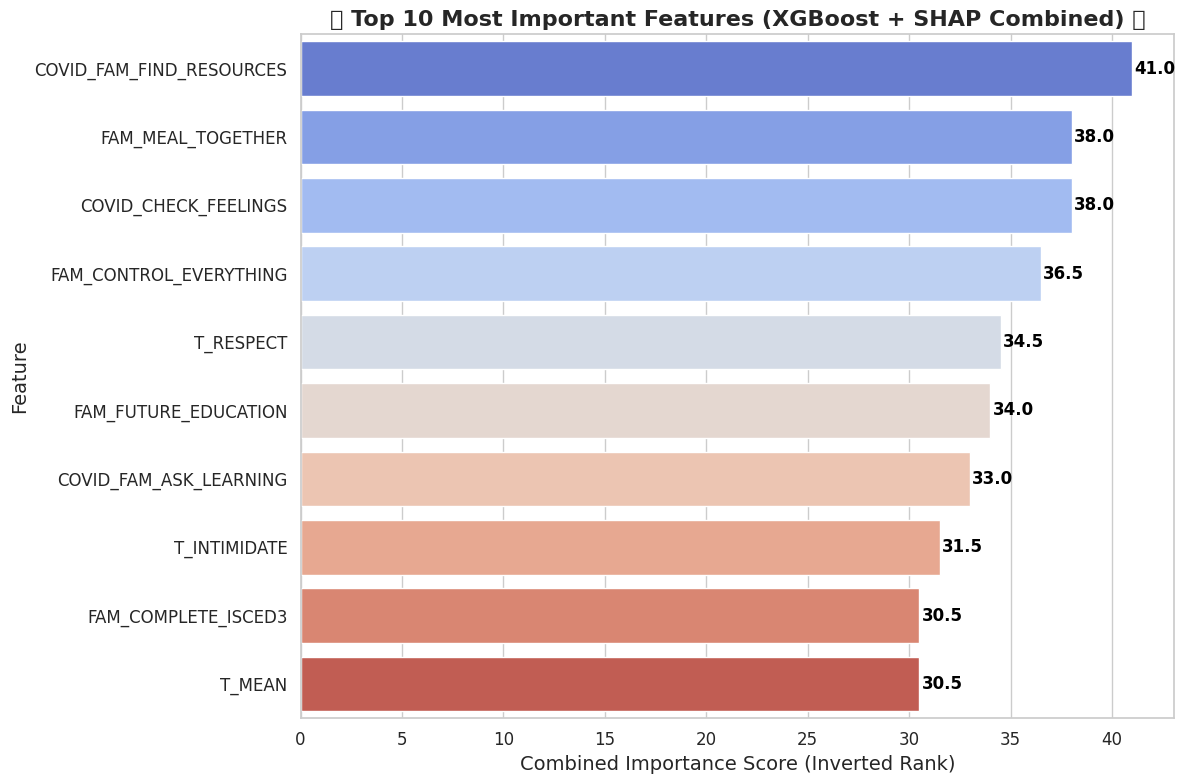

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ajustar importancia para visualización
max_rank = df_combined_sorted['combined_rank'].max()
df_combined_sorted['importance_score'] = max_rank + 1 - df_combined_sorted['combined_rank']

# Tomar top 10
top_features = df_combined_sorted.sort_values('importance_score', ascending=False).head(10)

# Set estilo bonito
sns.set_style('whitegrid')
plt.figure(figsize=(12, 8))

# Crear gráfico
ax = sns.barplot(
    x='importance_score',
    y='feature',
    data=top_features,
    palette='coolwarm'
)

# Agregar etiquetas al final de cada barra
for i, (value, feature) in enumerate(zip(top_features['importance_score'], top_features['feature'])):
    ax.text(value + 0.1, i, f'{value:.1f}', color='black', va='center', fontsize=12, fontweight='bold')

# Títulos y etiquetas
plt.xlabel('Combined Importance Score (Inverted Rank)', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.title('⭐ Top 10 Most Important Features (XGBoost + SHAP Combined) ⭐', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.show()

### Interpretabilidad top 5 variables

In [ ]:
# Poner aca una explicación de estas variables

#Predict-Proba

In [ ]:
from tabulate import tabulate
import pandas as pd

# Obtener las probabilidades de reprobar (clase 1)
proba_reprobar = model.predict_proba(X_test)[:, 1]

# Crear DataFrame con índices (IDs) de los estudiantes y su probabilidad
df_riesgo = pd.DataFrame({
    'student_id': X_test.index,  # usa aquí tu identificador real si tienes uno
    'probabilidad_reprobar': proba_reprobar
})

# Ordenar de mayor a menor riesgo
df_top20 = df_riesgo.sort_values(by='probabilidad_reprobar', ascending=False).head(20)

# Redondear para mejor visualización
df_top20['probabilidad_reprobar'] = df_top20['probabilidad_reprobar'].round(4)

print("🎯 Top 20 estudiantes más propensos a reprobar:\n")
print(tabulate(df_top20, headers='keys', tablefmt='fancy_grid', showindex=False))

🎯 Top 20 estudiantes más propensos a reprobar:

╒══════════════╤═════════════════════════╕
│   student_id │   probabilidad_reprobar │
╞══════════════╪═════════════════════════╡
│         5360 │                  0.9902 │
├──────────────┼─────────────────────────┤
│        26150 │                  0.9871 │
├──────────────┼─────────────────────────┤
│        20074 │                  0.9839 │
├──────────────┼─────────────────────────┤
│        16597 │                  0.9808 │
├──────────────┼─────────────────────────┤
│         5745 │                  0.9787 │
├──────────────┼─────────────────────────┤
│        20778 │                  0.9763 │
├──────────────┼─────────────────────────┤
│        23751 │                  0.9757 │
├──────────────┼─────────────────────────┤
│        21482 │                  0.9742 │
├──────────────┼─────────────────────────┤
│        27013 │                  0.9735 │
├──────────────┼─────────────────────────┤
│        15060 │                  0.9697 │
├─────

# MLFlow Final Logging and Download Results

In [ ]:

# mlflow.log_metric("auc_test", auc_test)
# mlflow.log_metric('f1_score', f1)



In [ ]:
# import shutil

# shutil.make_archive('/content/mlruns_archive', 'zip', '/content/mlflow')

mlflow.end_run()